<a href="https://colab.research.google.com/github/Pavithrabalusu/Edunet_clinical-decision-support-system/blob/main/Edunet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loaded Successfully
   Patient_ID  Age  Gender            Symptom_1    Symptom_2 Symptom_3  \
0           1   74    Male              Fatigue  Sore throat     Fever   
1           2   66  Female          Sore throat      Fatigue     Cough   
2           3   32    Male            Body ache  Sore throat   Fatigue   
3           4   21  Female  Shortness of breath     Headache     Cough   
4           5   53    Male           Runny nose  Sore throat   Fatigue   

   Heart_Rate_bpm  Body_Temperature_C Blood_Pressure_mmHg  \
0              69                39.4              132/91   
1              95                39.0              174/98   
2              77                36.8              136/60   
3              72                38.9              147/82   
4             100                36.6             109/106   

   Oxygen_Saturation_% Diagnosis  Severity       Treatment_Plan  
0                   94       Flu  Moderate  Medication and rest  
1                   98   Health

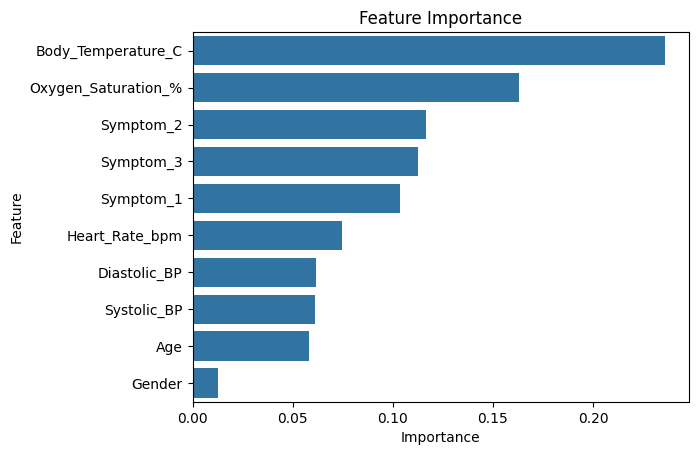

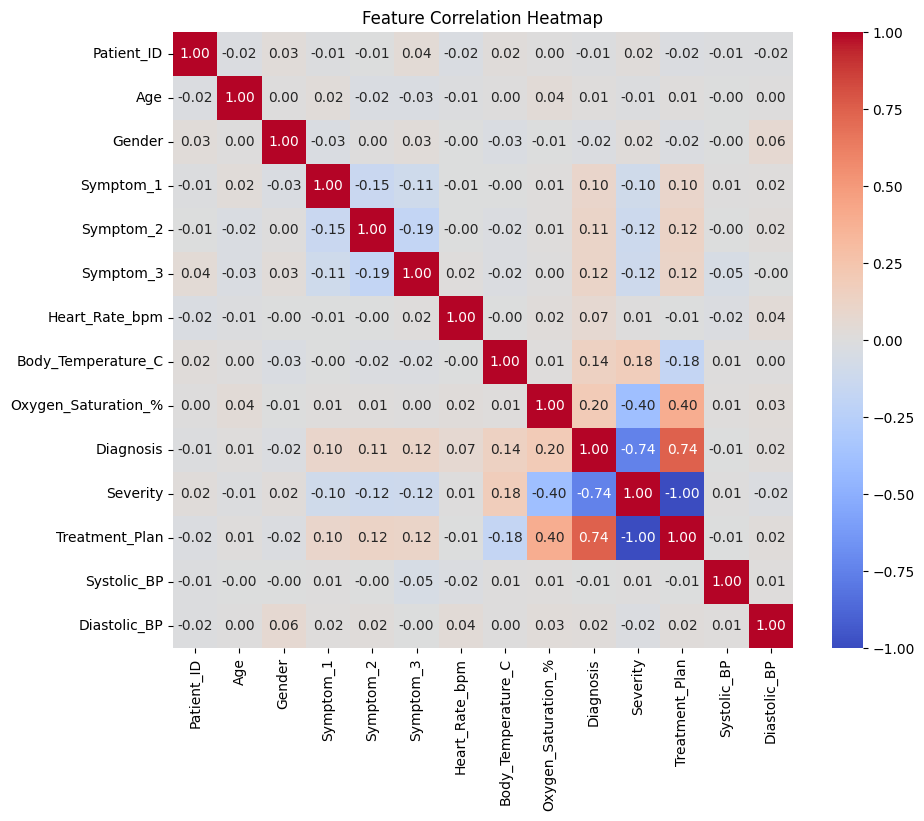

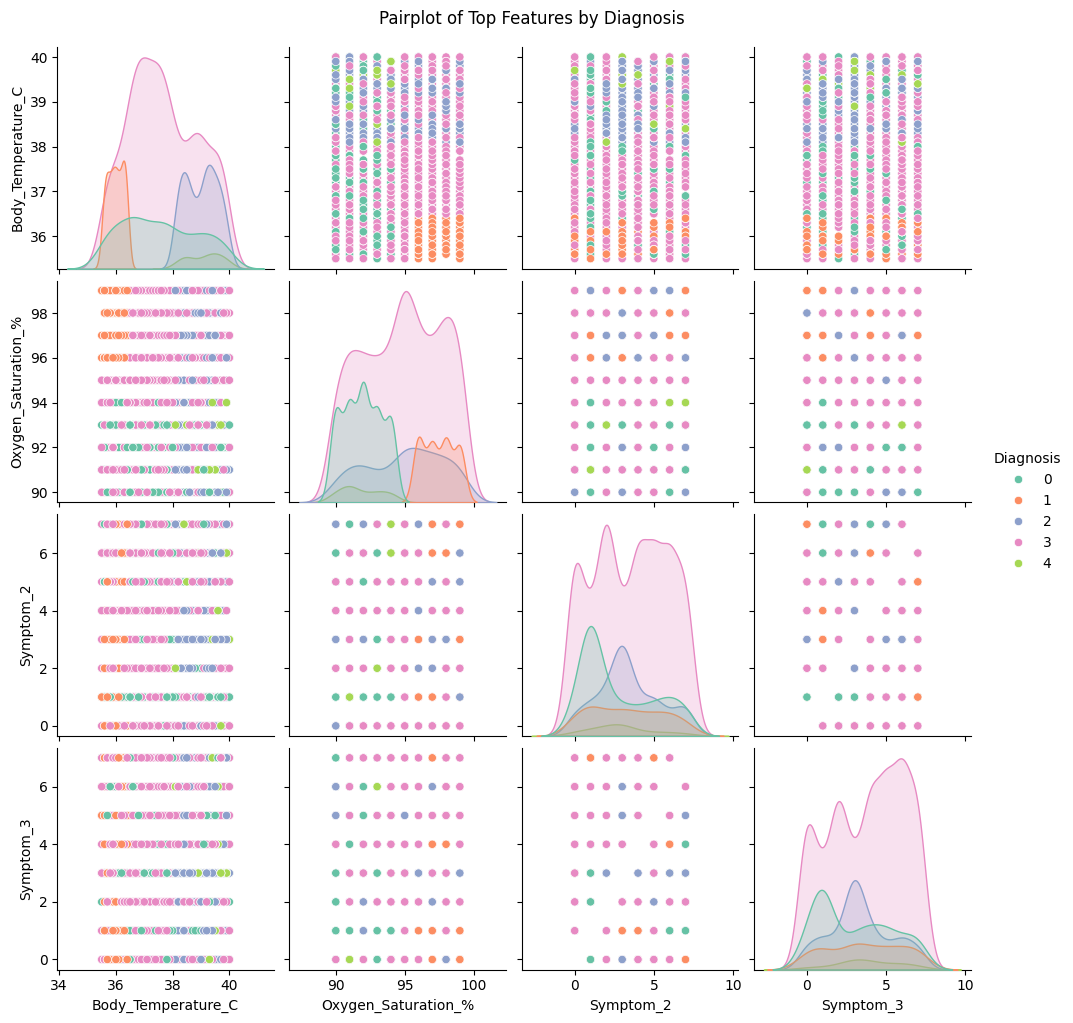

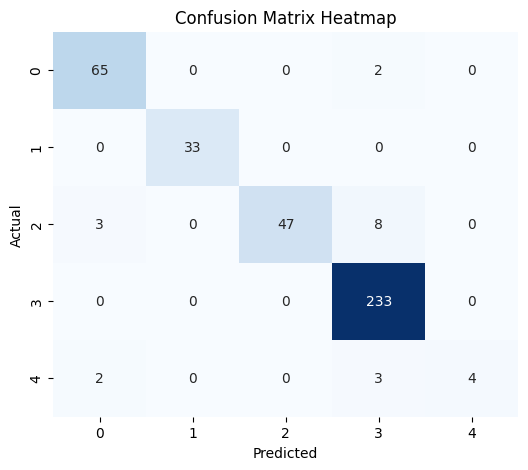

Modeling, evaluation, and extra plots complete!


In [ ]:
# Clinical Decision Support System

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset
file_path = 'disease_diagnosis.csv'  # Update this path to your file location
df = pd.read_csv(file_path)
print("Data Loaded Successfully")
print(df.head())

# Step 2: Split Blood Pressure into Systolic and Diastolic
bp_split = df['Blood_Pressure_mmHg'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(bp_split[0], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(columns=['Blood_Pressure_mmHg'], inplace=True)

# Step 3: Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Severity', 'Treatment_Plan', 'Diagnosis']:
    df[col] = le.fit_transform(df[col])

# Step 4: Define features and target
X = df[['Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
        'Heart_Rate_bpm', 'Body_Temperature_C', 'Systolic_BP', 'Diastolic_BP', 'Oxygen_Saturation_%']]
y = df['Diagnosis']  # Change to 'Treatment_Plan' if needed

# Step 5: Handle any missing values (if present)
X = X.fillna(X.mean())

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Step 9: Evaluate the model
y_pred = rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Plot Feature Importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Extra Plot 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Extra Plot 2: Pairplot of top important features
top_features = importance_df['Feature'].head(4).tolist()
sns.pairplot(df[top_features + ['Diagnosis']], hue='Diagnosis', palette='Set2')
plt.suptitle('Pairplot of Top Features by Diagnosis', y=1.02)
plt.show()

# Extra Plot 3: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("Modeling, evaluation, and extra plots complete!")
